In [1]:
# Uber dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
uber = pd.read_csv('datasets/uber.csv')

In [3]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
uber.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
uber2 = uber.drop(['Unnamed: 0', 'key'], axis=1)
uber2.dropna(axis=0, inplace=True)

In [6]:
uber2.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
def haversine(lon_1, lon_2, lat_1, lat_2):
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])

    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + np.cos(lat_1)*np.cos(lat_2)*np.sin(diff_lon/2.0)**2))

    return km

In [14]:
uber2['Distance'] = haversine(uber2['pickup_longitude'], uber2['dropoff_longitude'], uber2['pickup_latitude'], uber2['dropoff_latitude'])
uber2['Distance'] = uber2['Distance'].astype(float).round(2)

In [15]:
uber2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48


In [16]:
uber2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48


Text(0, 0.5, 'fare_amount')

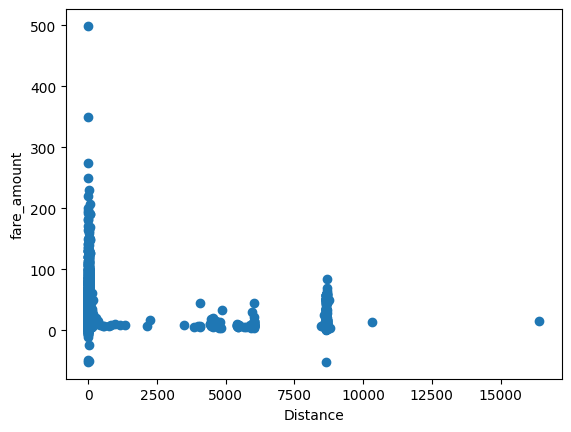

In [18]:
plt.scatter(uber2['Distance'], uber2['fare_amount'])
plt.xlabel('Distance')
plt.ylabel('fare_amount')

In [19]:
uber2.drop(uber2[uber2['Distance'] > 60].index, inplace=True)
uber2.drop(uber2[uber2['Distance'] == 0].index, inplace=True)
uber2.drop(uber2[uber2['fare_amount'] == 0].index, inplace=True)
uber2.drop(uber2[uber2['fare_amount'] < 0].index, inplace=True)


In [20]:
uber2.drop(uber2[(uber2['fare_amount']>100) & (uber2['Distance']<1)].index, inplace=True)
uber2.drop(uber2[(uber2['fare_amount']<100) & (uber2['Distance']>100)].index, inplace=True)

In [21]:
uber2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193481 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193481 non-null  float64
 1   pickup_datetime    193481 non-null  object 
 2   pickup_longitude   193481 non-null  float64
 3   pickup_latitude    193481 non-null  float64
 4   dropoff_longitude  193481 non-null  float64
 5   dropoff_latitude   193481 non-null  float64
 6   passenger_count    193481 non-null  int64  
 7   Distance           193481 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 13.3+ MB


Text(0, 0.5, 'Fare Amount')

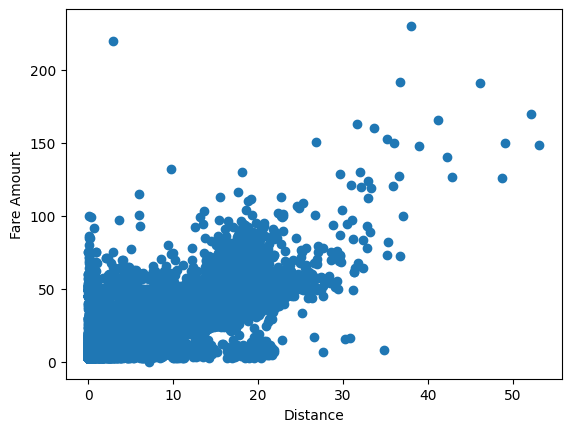

In [22]:
plt.scatter(uber2['Distance'], uber2['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("Fare Amount")

In [23]:
# Seperate date and time

uber2['pickup_datetime'] = pd.to_datetime(uber2['pickup_datetime'])
uber2['Year'] = uber2['pickup_datetime'].apply(lambda time: time.year)
uber2['Month'] = uber2['pickup_datetime'].apply(lambda time: time.month)
uber['Day'] = uber2['pickup_datetime'].apply(lambda time: time.day)
uber2['Day of Week'] = uber2['pickup_datetime'].apply(lambda time: time.dayofweek)
uber2['Day of Week_num'] = uber2['pickup_datetime'].apply(lambda time: time.dayofweek)
uber2['Hour'] = uber2['pickup_datetime'].apply(lambda time: time.hour)

day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
uber2['Day of Week'] = uber2['Day of Week'].map(day_map)

uber2['counter'] = 1


In [ ]:
uber2['pickup'] = uber2['pickup_latitude'].astype(str) + "," + uber2['pickup_longitude'].astype(str)   
uber2['drop off'] = uber2['dropoff_latitude'].astype(str) + "," + uber2['dropoff_longitude'].astype(str)

In [26]:
uber2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Day of Week,Day of Week_num,Hour,counter,pickup,drop off
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.68,2015,5,Thu,3,19,1,"40.73835372924805,-73.99981689453125","40.72321701049805,-73.99951171875"
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.46,2009,7,Fri,4,20,1,"40.728225,-73.994355","40.750325,-73.99471"
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.04,2009,8,Mon,0,21,1,"40.74077,-74.005043","40.772647,-73.962565"
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.66,2009,6,Fri,4,8,1,"40.790844,-73.976124","40.803349,-73.965316"
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.48,2014,8,Thu,3,17,1,"40.744085,-73.925023","40.761247,-73.97308199999999"


Average trips a year: 
[2009, 2010, 2011, 2012, 2013, 2014, 2015] [29674, 29094, 30712, 31138, 30365, 29065, 13433]


<BarContainer object of 7 artists>

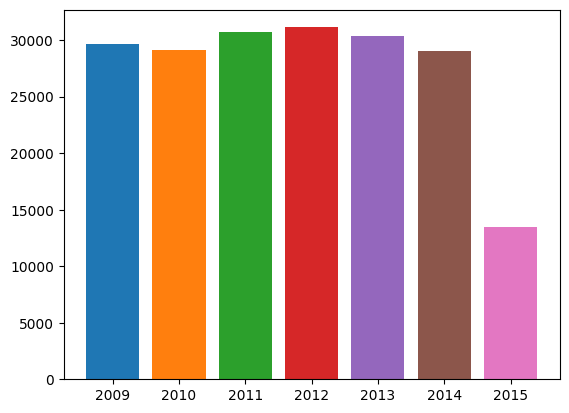

In [29]:
# Average yearly trips
no_of_trips = []
year = [2009, 2010, 2011, 2012, 2013, 2014, 2015]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in range(2009, 2016):
    x = uber2.loc[uber2['Year']==i, 'counter'].sum()
    no_of_trips.append(x)

print("Average trips a year: ")
print(year, no_of_trips)
plt.bar(year, no_of_trips, color=colors)

Average trips a Month: 
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] [17126, 16141, 18165, 18004, 18259, 17210, 14583, 13664, 14772, 15690, 14824, 15043]


<BarContainer object of 12 artists>

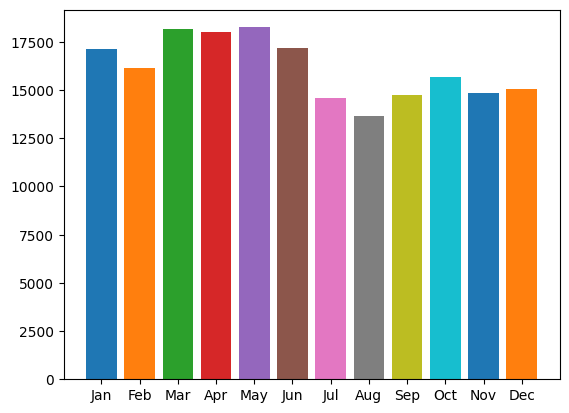

In [30]:
# Average monthly trips
no_of_trips = []
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


for i in range(1, 13):
    x = uber2.loc[uber2['Month']==i, 'counter'].sum()
    no_of_trips.append(x)

print("Average trips a Month: ")
print(month, no_of_trips)

plt.bar(month, no_of_trips, color=colors)

Average trips by Days: 
['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] [24377, 27236, 28084, 29041, 29865, 29306, 25572]


<BarContainer object of 7 artists>

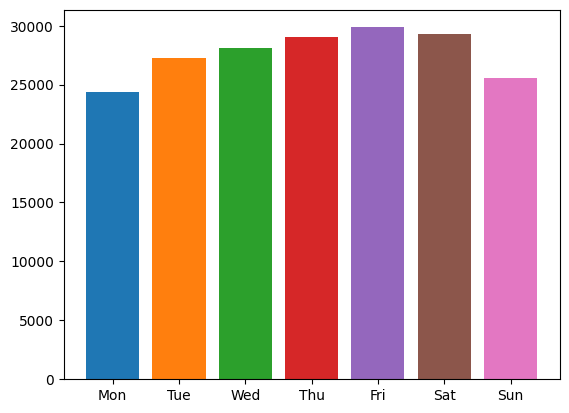

In [33]:
no_of_trips = []
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in range(0, 7):
    x = uber2.loc[uber2['Day of Week_num'] == i, 'counter'].sum()
    no_of_trips.append(x)

print("Average trips by Days: ")
print(day, no_of_trips)

plt.bar(day, no_of_trips, color=colors)

In [36]:
# Relation b/w avg number of rides over a period of time

year_vs_trips = uber2.groupby(['Year', 'Month']).agg(
    no_of_trips = ('counter', 'count'),
    Average_fair = ('fare_amount', 'mean'),
    Total_fair = ('fare_amount', 'sum'),
    Avg_distance = ('Distance', 'mean')
    ).reset_index()

year_vs_trips['avg_no_of_trips'] = year_vs_trips['no_of_trips']/30
year_vs_trips['month_year'] = year_vs_trips['Month'].astype(str) + ", " + year_vs_trips['Year'].astype(str)

year_vs_trips = year_vs_trips.reset_index()
year_vs_trips.head()

,index,Year,Month,no_of_trips,Average_fair,Total_fair,Avg_distance,avg_no_of_trips,month_year
0,0,2009,1,2471,9.532396,23554.55,3.039607,82.366667,"1, 2009"
1,1,2009,2,2237,9.692333,21681.75,3.065525,74.566667,"2, 2009"
2,2,2009,3,2632,10.089666,26556.00,3.247929,87.733333,"3, 2009"
3,3,2009,4,2501,10.081008,25212.60,3.224306,83.366667,"4, 2009"
4,4,2009,5,2588,10.000773,25882.00,3.230108,86.266667,"5, 2009"


<Axes: title={'center': 'No of trips vs months'}, xlabel='Jan 2009 - Jun 2015', ylabel='No of trips'>

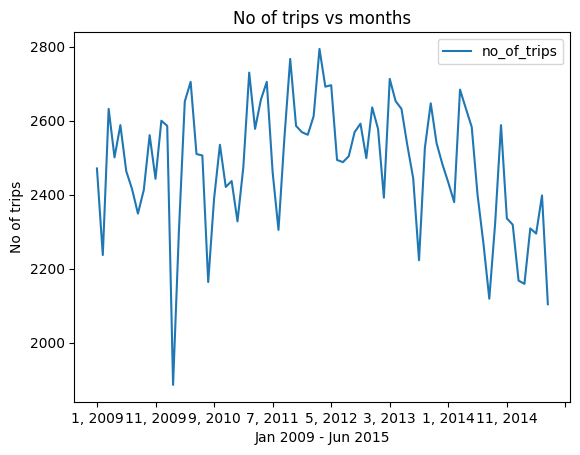

In [37]:
year_vs_trips.plot(kind='line', x='month_year', y = 'no_of_trips', xlabel='Jan 2009 - Jun 2015',
                   ylabel='No of trips', title='No of trips vs months')

In [38]:
# Heat map
import seaborn as sns

df1 = uber2[['Distance', 'Day of Week_num', 'Hour']].copy()
dfh = df1.copy()
dfh = dfh.groupby(['Hour', 'Day of Week_num']).mean()
dfh = dfh.unstack(level=0)

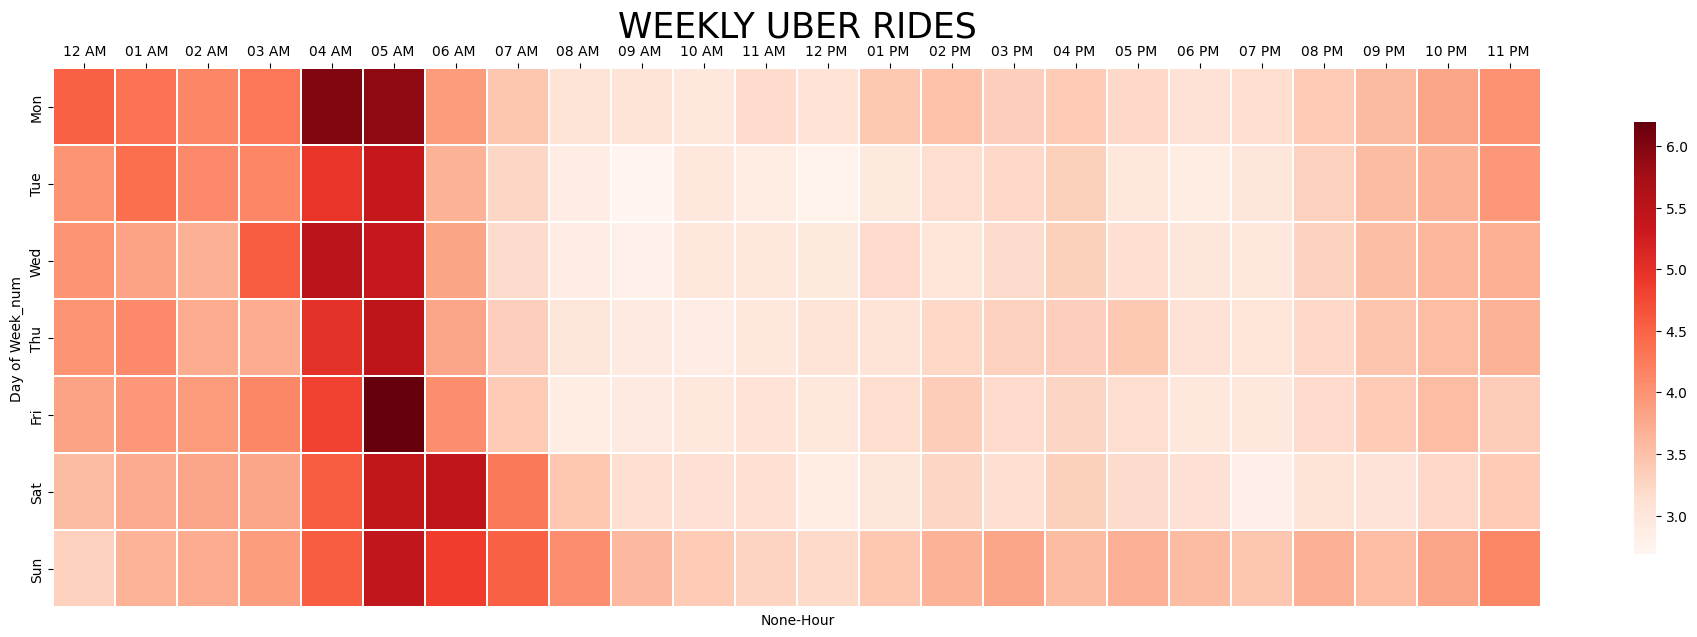

In [40]:
fig, ax = plt.subplots(figsize=(24,7))
sns.heatmap(dfh, cmap="Reds", linewidths=0.3, cbar_kws={'shrink': .8})

xticks_labels = ['12 AM', '01 AM', '02 AM ', '03 AM ', '04 AM ', '05 AM ', '06 AM ', '07 AM ', 
                 '08 AM ', '09 AM ', '10 AM ', '11 AM ', '12 PM ', '01 PM ', '02 PM ', '03 PM ',
                 '04 PM ', '05 PM ', '06 PM ', '07 PM ', '08 PM ', '09 PM ', '10 PM ', '11 PM ']

yticks_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.xticks(np.arange(24) + .5, labels=xticks_labels)
plt.yticks(np.arange(7) + .5, labels=yticks_labels)

ax.xaxis.tick_top()

title = 'Weekly uber rides'.upper()
plt.title(title, fontdict={'fontsize': 25})
plt.show()

C:\Users\Rishi\AppData\Local\Temp\ipykernel_24128\405223697.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber2['fare_amount'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


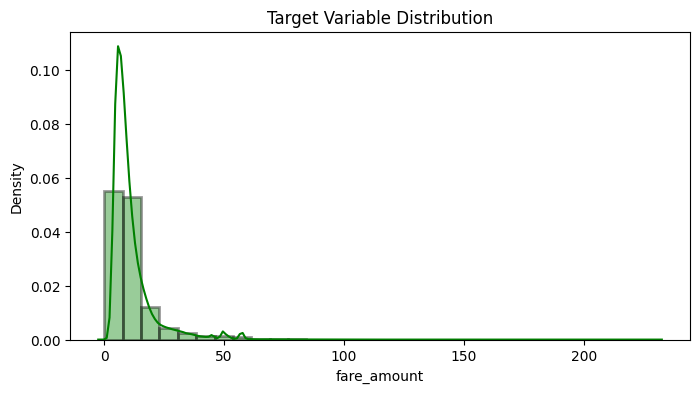

In [47]:
plt.figure(figsize=[8,4])
sns.distplot(uber2['fare_amount'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

In [48]:
# Statistics

import statistics as st
print("Mean of fare prices is % s "
         % (st.mean(uber2['fare_amount'])))

print("Median of fare prices is % s "
         % (st.median(uber2['fare_amount'])))

print("Standard Deviation of Fare Prices is % s "
                % (st.stdev(uber2['fare_amount'])))

Mean of fare prices is 11.311137476031238 
Median of fare prices is 8.5 
Standard Deviation of Fare Prices is 9.501354886915946 


In [49]:
print("Mean of Distance is % s "
         % (st.mean(uber2['Distance'])))

print("Median of Distance is % s "
         % (st.median(uber2['Distance'])))

print("Standard Deviation of Distance is % s "
                % (st.stdev(uber2['Distance'])))

Mean of Distance is 3.3573488352861522 
Median of Distance is 2.18 
Standard Deviation of Distance is 3.5995030824386185 


In [58]:
new_uber2 = uber2.drop(['Day of Week', 'pickup', 'drop off'], axis=1)

In [59]:
corr = new_uber2.corr()
corr.style.background_gradient(cmap = 'BuGn')

c:\Users\Rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\io\formats\style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\Rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\io\formats\style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Day of Week_num,Hour,counter
fare_amount,1.000000,0.128090,0.012070,-0.008682,0.010555,-0.008695,0.013508,0.893050,0.123562,0.024402,0.005140,-0.019788,nan
pickup_datetime,0.128090,1.000000,0.012630,-0.012824,0.012521,-0.013446,0.007016,0.028614,0.988015,0.038677,0.004670,0.001686,nan
pickup_longitude,0.012070,0.012630,1.000000,-0.949099,0.999883,-0.993975,0.009174,0.005337,0.013480,-0.007496,0.008241,0.001838,nan
pickup_latitude,-0.008682,-0.012824,-0.949099,1.000000,-0.949095,0.954759,-0.009219,0.003232,-0.013690,0.007602,-0.008922,-0.001821,nan
dropoff_longitude,0.010555,0.012521,0.999883,-0.949095,1.000000,-0.993962,0.009168,0.004406,0.013365,-0.007454,0.008536,0.000938,nan
dropoff_latitude,-0.008695,-0.013446,-0.993975,0.954759,-0.993962,1.000000,-0.009266,-0.002122,-0.014358,0.007979,-0.008916,-0.001016,nan
passenger_count,0.013508,0.007016,0.009174,-0.009219,0.009168,-0.009266,1.000000,0.007441,0.005378,0.009999,0.033846,0.013391,nan
Distance,0.893050,0.028614,0.005337,0.003232,0.004406,-0.002122,0.007441,1.000000,0.026560,0.012317,0.017183,-0.032447,nan
Year,0.123562,0.988015,0.013480,-0.013690,0.013365,-0.014358,0.005378,0.026560,1.000000,-0.115499,0.005973,0.001864,nan
Month,0.024402,0.038677,-0.007496,0.007602,-0.007454,0.007979,0.009999,0.012317,-0.115499,1.000000,-0.008911,-0.004259,nan


In [60]:
# Standardization

X = uber2['Distance'].values.reshape(-1, 1) # Independent variable
Y = uber2['fare_amount'].values.reshape(-1, 1) # Dependent variable

In [61]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(Y)
print(y_std)

x_std = std.fit_transform(X)
print(x_std)

[[-0.4011162 ]
 [-0.38006651]
 [ 0.16722527]
 ...
 [ 2.06169682]
 [ 0.33562274]
 [ 0.29352337]]
[[-0.46599576]
 [-0.24929862]
 [ 0.46746884]
 ...
 [ 2.63721838]
 [ 0.05074357]
 [ 0.57303924]]


In [62]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

In [63]:
# Linear regression
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()

l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.8006071


In [64]:
# Actual vs predicted
y_pred = l_reg.predict(X_test)
df = {'Actual': y_test, 'Predicted': y_pred}

from tabulate import tabulate
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

+-------------+--------------+
|      Actual |    Predicted |
|-------------+--------------|
| -0.548464   | -0.663476    |
| -0.769486   | -0.611449    |
|  0.651368   |  0.290356    |
|  6.86102    |  3.52595     |
| -0.611613   | -0.544557    |
| -0.16957    | -0.333971    |
| -0.295868   | -0.0490599   |
| -0.0853709  | -0.224961    |
| -0.506365   | -0.517305    |
| -0.558989   | -0.628792    |
|  0.914489   |  1.69261     |
|  2.94894    |  1.3854      |
|  0.0409272  | -0.202664    |
|  1.23023    |  0.282923    |
| -0.506365   | -0.584197    |
| -0.590563   | -0.599062    |
| -0.401116   | -0.378566    |
|  4.84341    |  4.53429     |
| -0.674762   | -0.524737    |
|  0.0198775  | -0.106042    |
| -0.337967   | -0.0986096   |
| -0.348492   | -0.54208     |
| -0.243244   | -0.158069    |
| -0.243244   | -0.272034    |
| -0.337967   | -0.566854    |
| -0.548464   | -0.537125    |
| -0.137995   | -0.309196    |
| -0.243244   | -0.42316     |
| -0.422166   | -0.279466    |
| -0.664

In [65]:
# Accuracy metrics

from sklearn import metrics
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  0.23979020298617207
Mean Squared Error: 0.19845894128014663
Root Mean Squared Error: 0.44548730765325584


In [66]:
print(f"Intercept: {l_reg.intercept_}, Coeff: {l_reg.coef_}")

Intercept: [-0.00016705], Coeff: [[0.89176936]]


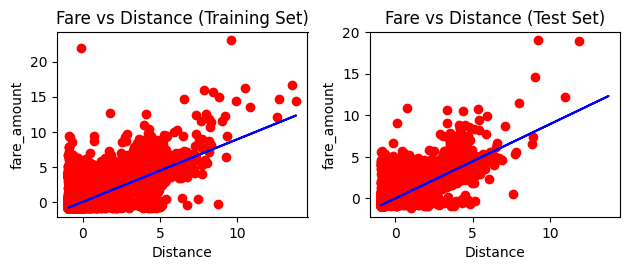

In [67]:
plt.subplot(2,2,1)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color='blue')
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")

plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")

plt.tight_layout()
plt.rcParams["figure.figsize"] = (32,22)
plt.show()